In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas import get_dummies
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<h1>Load data</h1>

In [2]:
file_name = "F:\EE596\iris.data.csv"

In [3]:
#load the dataset into memory
dataset = pd.read_csv(file_name,header=None,\
                      names=['sepal_length','sepal_width','petal_length','petal_width','species'])
#check several examples of data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h1>Data preprocessing</h1>

In [4]:
#simple function to process the data.
"""
input:
    data: iris dataset
    num_features: 2 => select only petal width and petal width.
                  4 => select all features
    flower: 'Iris-setosa' => labels of Iris-setosa will be 1 and others will be 0
            'Iris-virginica' => labels of Iris-virginica will be 1 and others will be 0
            'None' => use one-hot encoding to represent the labels

return:
    x: normalized & shuffled data
    y: labels
"""
def data_preprocessing(data,num_features,flower=None):
    if num_features==2:
        features = data.columns[2:4]
    else:
        features = data.columns[0:4]
    labels = dataset.columns[4]
    print(features)
    print(labels)
    #normalize the data
    data_norm = pd.DataFrame(data)
    for feature in features:
        data[feature] = (data[feature]-data[feature].mean())/data[feature].std()

    #shuffle the data
    indices = data_norm.index.tolist()
    indices = np.array(indices)
    np.random.shuffle(indices)
    x = data_norm.reindex(indices)[features]
    y = data_norm.reindex(indices)[labels]
    if flower=='Iris-setosa':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-setosa' else 0
        y = y.values.reshape(len(y),1)
    elif flower=='Iris-virginica':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-virginica' else 0
        y = y.values.reshape(len(y),1)
    else:
        y = get_dummies(y)
    return x,y

<h1>Part a:

In [5]:
x_1,y_1 = data_preprocessing(dataset,2,flower='Iris-setosa')
#generate traning and validation sets
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size=0.3)
print(x_train_1)
print(x_train_1['petal_length'][39])

Index(['petal_length', 'petal_width'], dtype='object')
species
     petal_length  petal_width
34      -1.280118    -1.439627
86       0.533509     0.394849
51       0.420157     0.394849
94       0.250129     0.132781
91       0.476833     0.263815
148      0.930239     1.443121
35      -1.450146    -1.308593
44      -1.053415    -1.046525
101      0.760212     0.918985
137      0.986915     0.787951
41      -1.393470    -1.177559
0       -1.336794    -1.308593
23      -1.166767    -0.915491
33      -1.336794    -1.308593
11      -1.223442    -1.308593
22      -1.563497    -1.308593
13      -1.506822    -1.439627
123      0.646860     0.787951
82       0.080102     0.001747
103      1.043591     0.787951
127      0.646860     0.787951
87       0.363481     0.132781
49      -1.336794    -1.308593
106      0.420157     0.656917
64      -0.089926     0.132781
2       -1.393470    -1.308593
74       0.306805     0.132781
99       0.193454     0.132781
116      0.986915     0.787951
131    

KeyError: 39

<h2>Define hyper-parameters</h2>

In [6]:
lr = 0.01
num_steps = 200
#n_hidden_1 = 64
#n_hidden_2 = 32
num_input = 105
test_num = 45

<h2>Define Placeholder and Variables</h2>

In [7]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32,shape=[num_input,2],name='X')
Y = tf.placeholder(tf.float32,shape=[num_input,1],name='Y')
A = tf.placeholder(tf.float32,shape=[test_num,2],name='A')
B = tf.placeholder(tf.float32,shape=[test_num,1],name='B')
W = tf.Variable(tf.random_normal([2,1]),tf.float32,name='W')
#define the bias with zero initialization
b = tf.Variable(tf.zeros([1,1]),tf.float32,name='b')

Instructions for updating:
Colocations handled automatically by placer.


<h2>Define update rule and accuracy</h2>

In [8]:
Y_hat = tf.sigmoid(tf.add(tf.matmul(X,W),b))
B_hat = tf.sigmoid(tf.add(tf.matmul(A,W),b))
loss = tf.reduce_mean(tf.square(Y-Y_hat))
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
train_op = optimizer.minimize(loss)
#dW = tf.matmul(tf.transpose(X),loss)
#db = tf.reduce_sum(loss,0)
#W_ = W + lr*dW
#b_ = b + lr*db
correct_pred = tf.equal(tf.round(Y_hat),Y)
correct_prediction = tf.equal(tf.round(B_hat),B)
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))
accur = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
#group two operations together
#step = tf.group(W.assign(W_), b.assign(b_))

<h2>Execute training</h2>

In [9]:
init = tf.global_variables_initializer()
acc_1 = np.zeros(num_steps)
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(num_steps):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(train_op,feed_dict = {X:x_train_1,Y:y_train_1})
        acc_1[i] = sess.run(accuracy, feed_dict = {X:x_train_1,Y:y_train_1})
        if i % 10 == 0:
            cost = sess.run(loss, feed_dict = {X:x_train_1,Y:y_train_1})
            
            print("step "+str(i)+", cost= {:.3f}".format(cost))
            print("step "+str(i)+", Accuracy= {:.9f}".format(acc_1[i]))
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]

    print("Test Accuracy:" + str(sess.run(accur, feed_dict = {A:x_test_1,B:y_test_1})))
    W_1 = np.squeeze(sess.run(W))
    b_1 = np.squeeze(sess.run(b))

step 0, cost= 0.099
step 0, Accuracy= 0.933333337
step 10, cost= 0.081
step 10, Accuracy= 0.933333337
step 20, cost= 0.067
step 20, Accuracy= 0.942857146
step 30, cost= 0.057
step 30, Accuracy= 0.952380955
step 40, cost= 0.049
step 40, Accuracy= 0.961904764
step 50, cost= 0.043
step 50, Accuracy= 0.990476191
step 60, cost= 0.038
step 60, Accuracy= 0.990476191
step 70, cost= 0.034
step 70, Accuracy= 1.000000000
step 80, cost= 0.031
step 80, Accuracy= 1.000000000
step 90, cost= 0.028
step 90, Accuracy= 1.000000000
step 100, cost= 0.026
step 100, Accuracy= 1.000000000
step 110, cost= 0.024
step 110, Accuracy= 1.000000000
step 120, cost= 0.022
step 120, Accuracy= 1.000000000
step 130, cost= 0.021
step 130, Accuracy= 1.000000000
step 140, cost= 0.019
step 140, Accuracy= 1.000000000
step 150, cost= 0.018
step 150, Accuracy= 1.000000000
step 160, cost= 0.017
step 160, Accuracy= 1.000000000
step 170, cost= 0.016
step 170, Accuracy= 1.000000000
step 180, cost= 0.015
step 180, Accuracy= 1.000000

<h2>Plot</h2>

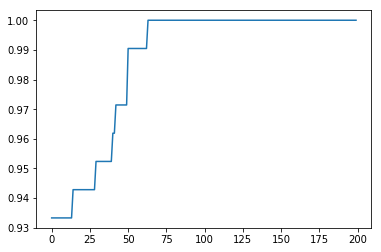

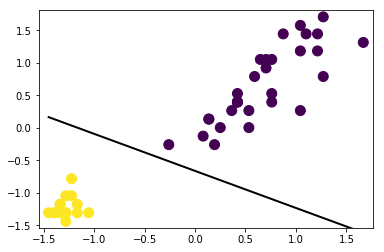

In [10]:
plt.plot(range(len(acc_1)),acc_1)
plt.show()
plot_x = np.array([np.min(x_test_1['petal_length'][:]), np.max(x_test_1['petal_width'][:])])
plot_y = 1 / W_1[1] * (-W_1[0] * plot_x - b_1)
plt.scatter(x_test_1['petal_length'][:], x_test_1['petal_width'][:], c=np.squeeze(y_test_1), s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([np.min(x_test_1['petal_length'][:]) - 0.1,np.max(x_test_1['petal_length'][:]) + 0.1]);
plt.ylim([np.min(x_test_1['petal_width'][:]) - 0.1,np.max(x_test_1['petal_width'][:]) + 0.1]);
plt.show()

The setosa can be separated linearly with other two species, or in other words the setosa is totally different with other
two species in some way.

<h1>Part b:</h1>

In [11]:
x_2,y_2 = data_preprocessing(dataset,2,flower='Iris-virginica')
#generate traning and validation sets
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size=0.3)

Index(['petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameter</h2>

In [12]:
lr = 0.01
num_steps = 200
#n_hidden_1 = 64
#n_hidden_2 = 32
num_input = 105
test_num = 45

<h2>Define Placeholder and Variables</h2>

In [13]:
tf.reset_default_graph()
tf.reset_default_graph()
X = tf.placeholder(tf.float32,shape=[num_input,2],name='X')
Y = tf.placeholder(tf.float32,shape=[num_input,1],name='Y')
A = tf.placeholder(tf.float32,shape=[test_num,2],name='A')
B = tf.placeholder(tf.float32,shape=[test_num,1],name='B')
W = tf.Variable(tf.random_normal([2,1]),tf.float32,name='W')
#define the bias with zero initialization
b = tf.Variable(tf.zeros([1,1]),tf.float32,name='b')

<h2>Define update rule and accuracy</h2>

In [14]:
Y_hat = tf.sigmoid(tf.add(tf.matmul(X,W),b))
B_hat = tf.sigmoid(tf.add(tf.matmul(A,W),b))
loss = tf.reduce_mean(tf.square(Y-Y_hat))
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
train_op = optimizer.minimize(loss)
#dW = tf.matmul(tf.transpose(X),loss)
#db = tf.reduce_sum(loss,0)
#W_ = W + lr*dW
#b_ = b + lr*db
correct_pred = tf.equal(tf.round(Y_hat),Y)
correct_prediction = tf.equal(tf.round(B_hat),B)
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))
accur = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
#group two operations together
#step = tf.group(W.assign(W_), b.assign(b_))

<h2>Execute training</h2>

In [17]:
init = tf.global_variables_initializer()
acc_2 = np.zeros(num_steps)
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(num_steps):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(train_op,feed_dict = {X:x_train_2,Y:y_train_2})
        acc_2[i] = sess.run(accuracy, feed_dict = {X:x_train_2,Y:y_train_2})
        if i % 10 == 0:
            cost = sess.run(loss, feed_dict = {X:x_train_2,Y:y_train_2})
            
            print("step "+str(i)+", cost= {:.3f}".format(cost))
            print("step "+str(i)+", Accuracy= {:.9f}".format(acc_2[i]))
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]

    print("Test Accuracy:" + str(sess.run(accur, feed_dict = {A:x_test_2,B:y_test_2})))
    W_2 = np.squeeze(sess.run(W))
    b_2 = np.squeeze(sess.run(b))

step 0, cost= 0.524
step 0, Accuracy= 0.285714298
step 10, cost= 0.485
step 10, Accuracy= 0.304761916
step 20, cost= 0.439
step 20, Accuracy= 0.314285725
step 30, cost= 0.388
step 30, Accuracy= 0.333333343
step 40, cost= 0.336
step 40, Accuracy= 0.342857152
step 50, cost= 0.287
step 50, Accuracy= 0.485714287
step 60, cost= 0.246
step 60, Accuracy= 0.685714304
step 70, cost= 0.213
step 70, Accuracy= 0.685714304
step 80, cost= 0.187
step 80, Accuracy= 0.685714304
step 90, cost= 0.167
step 90, Accuracy= 0.695238113
step 100, cost= 0.151
step 100, Accuracy= 0.752380967
step 110, cost= 0.138
step 110, Accuracy= 0.838095248
step 120, cost= 0.127
step 120, Accuracy= 0.866666675
step 130, cost= 0.119
step 130, Accuracy= 0.904761910
step 140, cost= 0.113
step 140, Accuracy= 0.952380955
step 150, cost= 0.107
step 150, Accuracy= 0.952380955
step 160, cost= 0.103
step 160, Accuracy= 0.942857146
step 170, cost= 0.099
step 170, Accuracy= 0.952380955
step 180, cost= 0.096
step 180, Accuracy= 0.952380

<h2>Plot</h2>

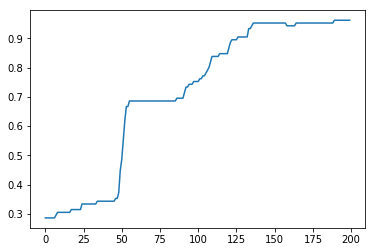

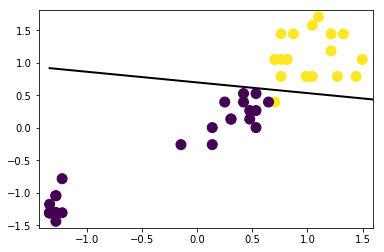

In [18]:
plt.plot(range(len(acc_2)),acc_2)
plt.show()
plot_x = np.array([np.min(x_test_2['petal_length'][:]), np.max(x_test_2['petal_width'][:])])
plot_y = 1 / W_2[1] * (-W_2[0] * plot_x - b_2)
plt.scatter(x_test_2['petal_length'][:], x_test_2['petal_width'][:], c=np.squeeze(y_test_2), s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([np.min(x_test_2['petal_length'][:]) - 0.1,np.max(x_test_2['petal_length'][:]) + 0.1]);
plt.ylim([np.min(x_test_2['petal_width'][:]) - 0.1,np.max(x_test_2['petal_width'][:]) + 0.1]);
plt.show()

The virginica cannot be separated linearly with the width and length of petal. In other words, we can not distinguish virginica 
with only the width and length of petal.

<h1>Part c:</h1>

In [19]:
x_3,y_3 = data_preprocessing(dataset,4)
#generate traning and validation sets
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3,y_3,test_size=0.3)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameters</h2>

In [20]:
#learning rate
lr = 0.1
#number of traning steps
num_steps = 200

#network parameters
n_hidden_1 = 256
n_hidden_2 = 128
num_input = 105
test_num = 45
num_classes = 3

<h2>Define placehoder and variables</h2>

In [21]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32,shape=[None,4],name='X')
Y = tf.placeholder(tf.float32,shape=[None,num_classes],name='Y')

weights = {
    'W1': tf.Variable(tf.random_normal([4, n_hidden_1]),name='W1'),
    'W2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]),name='W2'),
    'Wout': tf.Variable(tf.random_normal([n_hidden_2, num_classes]),name='Wout')
}

biases = {
    'b1': tf.Variable(tf.zeros(shape=[n_hidden_1]),name='b1'),
    'b2': tf.Variable(tf.zeros(shape=[n_hidden_2]),name='b2'),
    'bout': tf.Variable(tf.zeros(shape=[num_classes]),name='bout')
}

<h2>Define the neural network</h2>

In [22]:
def neural_net(x):
    layer_1_out = tf.add(tf.matmul(x,weights['W1']),biases['b1'])
    layer_1_out = tf.nn.relu(layer_1_out)
    layer_2_out = tf.add(tf.matmul(layer_1_out,weights['W2']),biases['b2'])
    layer_2_out = tf.nn.relu(layer_2_out)
    out = tf.add(tf.matmul(layer_2_out,weights['Wout']),biases['bout'])
    return out


<h2>Define cost function and accuracy</h2>

In [23]:
logits = neural_net(X)

#define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')
#define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

#Initialize the variables
init = tf.global_variables_initializer()



<h2>Execute training</h2>

In [24]:
acc_3 = np.zeros(num_steps)
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(num_steps):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(train_op,feed_dict = {X:x_train_3,Y:y_train_3})
        acc_3[i] = sess.run(accuracy, feed_dict = {X:x_train_3,Y:y_train_3})
        if i % 10 == 0:
            cost = sess.run(loss, feed_dict = {X:x_train_3,Y:y_train_3})
            
            print("step "+str(i)+", cost= {:.3f}".format(cost))
            print("step "+str(i)+", Accuracy= {:.9f}".format(acc_3[i]))
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]

    print("Test Accuracy:" + str(sess.run(accuracy, feed_dict = {X:x_test_3,Y:y_test_3})))

step 0, cost= 80.120
step 0, Accuracy= 0.828571439
step 10, cost= 0.222
step 10, Accuracy= 0.971428573
step 20, cost= 0.046
step 20, Accuracy= 0.990476191
step 30, cost= 0.000
step 30, Accuracy= 1.000000000
step 40, cost= 0.000
step 40, Accuracy= 1.000000000
step 50, cost= 0.000
step 50, Accuracy= 1.000000000
step 60, cost= 0.000
step 60, Accuracy= 1.000000000
step 70, cost= 0.000
step 70, Accuracy= 1.000000000
step 80, cost= 0.000
step 80, Accuracy= 1.000000000
step 90, cost= 0.000
step 90, Accuracy= 1.000000000
step 100, cost= 0.000
step 100, Accuracy= 1.000000000
step 110, cost= 0.000
step 110, Accuracy= 1.000000000
step 120, cost= 0.000
step 120, Accuracy= 1.000000000
step 130, cost= 0.000
step 130, Accuracy= 1.000000000
step 140, cost= 0.000
step 140, Accuracy= 1.000000000
step 150, cost= 0.000
step 150, Accuracy= 1.000000000
step 160, cost= 0.000
step 160, Accuracy= 1.000000000
step 170, cost= 0.000
step 170, Accuracy= 1.000000000
step 180, cost= 0.000
step 180, Accuracy= 1.00000

<h2>Plot</h2>

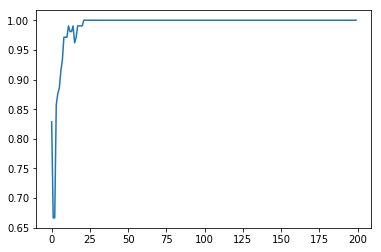

In [25]:
plt.plot(range(len(acc_3)),acc_3)
plt.show()